In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/linear_regression_dataset.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Describe the dataset for basic statistics
print("\nBasic statistics of the dataset:")
print(data.describe())

# Drop rows with missing values
data.dropna(inplace=True)

# Select features (X) and target (y)

X = data[['AGE', 'FEMALE', 'LOS', 'RACE', 'APRDRG']]
y = data['TOTCHG']

# Normalize the features by scaling them to a range [0,1]
X = (X - X.mean()) / X.std()  # Feature standardization (z-score normalization)

# Add a column of 1s to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add bias column (1s) to the feature matrix

print("\nFeatures (X) after standardization and adding intercept term:")
print(X[:5])


Mounted at /content/drive
First few rows of the dataset:
   AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
0   17       1    2   1.0    2660     560
1   17       0    2   1.0    1689     753
2   17       1    7   1.0   20060     930
3   17       1    1   1.0     736     758
4   17       1    1   1.0    1194     754

Missing values in the dataset:
AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

Basic statistics of the dataset:
              AGE      FEMALE         LOS        RACE        TOTCHG  \
count  500.000000  500.000000  500.000000  499.000000    500.000000   
mean     5.086000    0.512000    2.828000    1.078156   2774.388000   
std      6.949474    0.500357    3.363487    0.514746   3888.407367   
min      0.000000    0.000000    0.000000    1.000000    532.000000   
25%      0.000000    0.000000    2.000000    1.000000   1216.250000   
50%      0.000000    1.000000    2.000000    1.000000   1536.500000   
75%     13.000000    1.000000    3.000000  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
def linear_regression(X, y, lr=0.01, epochs=1000):
    m = len(X)  # Number of training examples
    n = X.shape[1]  # Number of features (including bias)

    # Initialize weights (w) and bias (b) with zeros
    w = np.zeros(n)
    b = 0

    cost_history = []  # To track cost function value

    # Gradient Descent loop
    for i in range(epochs):
        # Prediction using current weights and bias
        y_hat = np.dot(X, w) + b

        # Calculate the error (difference between predictions and actual values)
        error = y_hat - y

        # Compute gradients
        w_gradient = (1/m) * np.dot(X.T, error)  # Gradient of weights
        b_gradient = (1/m) * np.sum(error)  # Gradient of bias

        # Update weights and bias
        w -= lr * w_gradient
        b -= lr * b_gradient

        # Compute the cost (Mean Squared Error)
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Print cost every 100 epochs
        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost}")

    return w, b, cost_history


In [4]:
# Set hyperparameters
learning_rate = 0.01
epochs = 1000

# Train the model
# Removed .values from X and y since they are already numpy arrays
w, b, cost_history = linear_regression(X, y.values, lr=learning_rate, epochs=epochs)

# Print final weights and bias
print("Final weights:", w)
print("Final bias:", b)

def r_squared(y, y_hat):
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_hat)**2)
    return 1 - (ss_residual / ss_total)

# Predict on the training set
y_pred = np.dot(X, w) + b

# Calculate R-squared
r2 = r_squared(y.values, y_pred)
print(f"R-squared: {r2:.4f}")

Epoch 0, Cost: 11414843.951903807
Epoch 100, Cost: 4103009.1882773186
Epoch 200, Cost: 3485196.39675653
Epoch 300, Cost: 3392880.1348198857
Epoch 400, Cost: 3377145.7641859176
Epoch 500, Cost: 3374344.8252037154
Epoch 600, Cost: 3373831.977635403
Epoch 700, Cost: 3373735.9251098884
Epoch 800, Cost: 3373717.584933296
Epoch 900, Cost: 3373714.022590593
Final weights: [ 1388.81562893   935.98660407  -195.24610877  2501.66051333
  -109.25790108 -1390.41048542]
Final bias: 1388.8156289251942
R-squared: 0.5536


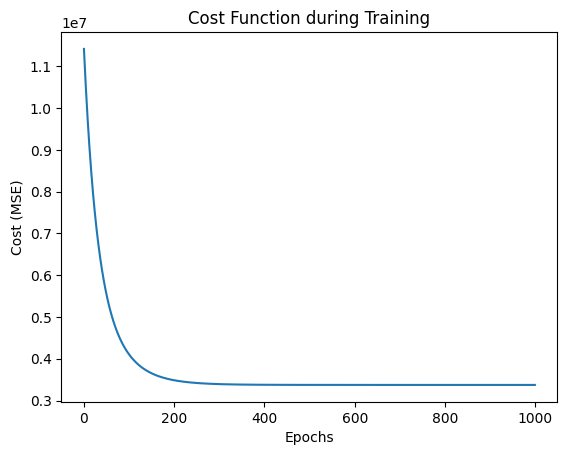

In [5]:
import matplotlib.pyplot as plt

# Plot the cost function over iterations
plt.plot(range(epochs), cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function during Training")
plt.show()
